<a href="https://colab.research.google.com/github/DevanshSaini18/Income-classifier/blob/main/Feature_vizualiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/final_adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income,education-num-bins,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital-status_0,marital-status_1,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.030671,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,1,1,2174,0,0.103983,3,0,4,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.837109,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,1,1,0,0,-1.875457,3,0,4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.042642,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,1,1,0,0,0.103983,3,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.057047,Private,234721,High school,7,1,Handlers-cleaners,Husband,0,1,0,0,0.103983,3,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.775768,Private,338409,Bachelors,13,1,Prof-specialty,Wife,0,0,0,0,0.103983,3,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
df.describe()

,age,fnlwgt,education-num,marital-status,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income,education-num-bins,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital-status_0,marital-status_1,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
count,32540.000000,3.254000e+04,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.000000,32540.00000,32540.000000,32540.000000
mean,-0.000006,1.897773e+05,10.081684,0.460664,0.854302,0.669207,1078.134419,87.360172,0.136487,2.956454,0.240965,2.518500,0.029502,0.064321,0.753903,0.034296,0.078089,0.039889,0.539336,0.460664,0.115765,0.000277,0.125937,0.124954,0.030363,0.042071,0.061494,0.101229,0.004579,0.183651,0.019945,0.11217,0.028519,0.049047
std,0.999565,1.055581e+05,2.572761,0.498458,0.352808,0.470506,7387.602052,403.084123,0.904862,0.440410,0.427676,0.922283,0.169212,0.245327,0.430742,0.181992,0.268315,0.195702,0.498458,0.498458,0.319948,0.016629,0.331784,0.330672,0.171586,0.200755,0.240237,0.301637,0.067514,0.387205,0.139812,0.31558,0.166452,0.215970
min,-1.582206,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.755208,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-0.775768,1.178010e+05,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.103983,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,-0.115955,1.783765e+05,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.103983,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.690484,2.370650e+05,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.470546,3.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,3.769612,1.484705e+06,16.000000,1.000000,1.000000,1.000000,99999.000000,4356.000000,4.429426,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.isnull().sum()

age                             0
workclass                       0
fnlwgt                          0
education                       0
education-num                   0
marital-status                  0
occupation                      0
relationship                    0
race                            0
sex                             0
capital-gain                    0
capital-los                     0
hours-per-week                  0
native-country                  0
Income                          0
education-num-bins              0
workclass_Federal-gov           0
workclass_Local-gov             0
workclass_Private               0
workclass_Self-emp-inc          0
workclass_Self-emp-not-inc      0
workclass_State-gov             0
marital-status_0                0
marital-status_1                0
occupation_Adm-clerical         0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Han

In [6]:
# df. dropna(subset = ["column2"], inplace=True) 
def remove_nan(columns):
    global df
    for column in columns:
        df.dropna(subset = [column],inplace = True)
li = ["marital-status","occupation","relationship","hours-per-week","Income"]
remove_nan(li)

In [7]:
print(len(df),len(df.columns),df.columns)

32540 38 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-los', 'hours-per-week', 'native-country',
       'Income', 'education-num-bins', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'marital-status_0',
       'marital-status_1', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')


### Age analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.5589306771020991

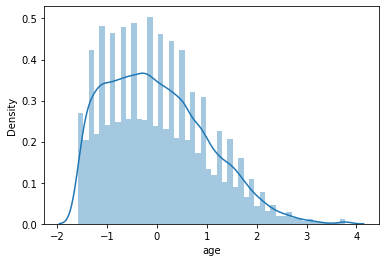

In [8]:
sns.distplot(df['age'])
df["age"].skew()

#### Get some quantitative measure

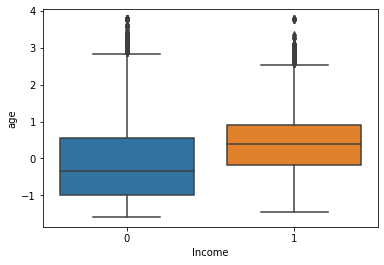

In [9]:
sns.boxplot(x = 'Income' , y = 'age' , data = df)

In [10]:
df[["age"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32540 entries, 0 to 32539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     32540 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


Pearsons correlation: 0.069
No correlation


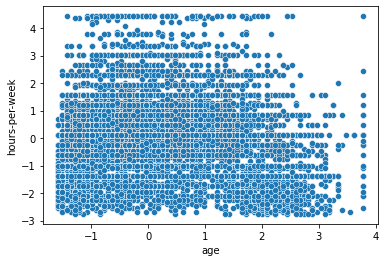

In [11]:
sns.scatterplot(x = df['age'],y=df["hours-per-week"])
corr, _ = pearsonr(df['age'], df["hours-per-week"])
print('Pearsons correlation: %.3f' % corr)
print("No correlation")

#### hours-per-week 

In [12]:
df[['hours-per-week']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32540 entries, 0 to 32539
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hours-per-week  32540 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


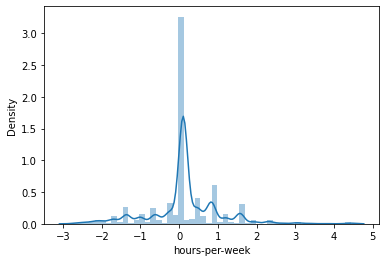

In [13]:
sns.distplot( df["hours-per-week"])

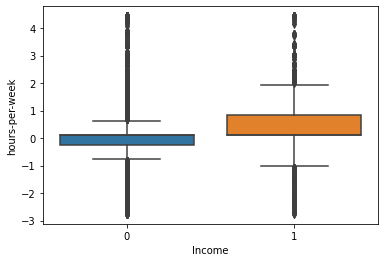

In [14]:
sns.boxplot(x = 'Income' , y = 'hours-per-week' , data = df)

#### native-country analysis

In [15]:
df["native-country"].value_counts()

3    30121
1     1131
4      786
2      315
5      187
Name: native-country, dtype: int64

[3 2 5 1 4]


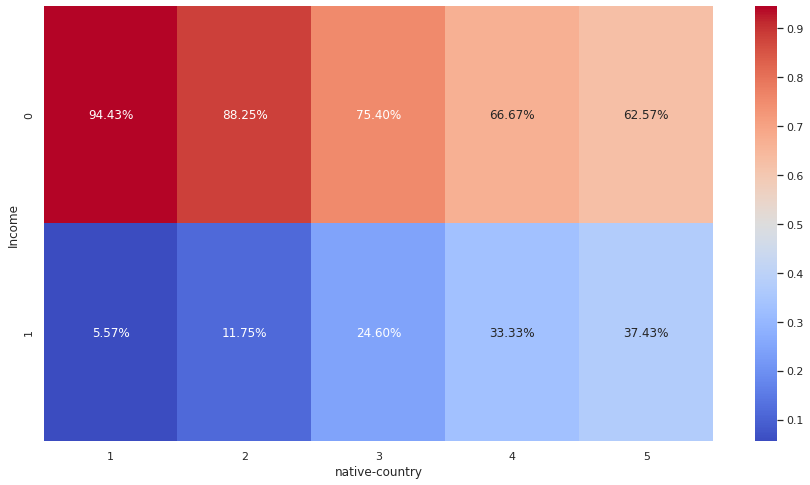

In [16]:
# df1 = df[["native-country","Income"]].groupby(["native-country", "Income"]).size().unstack(level=0)
# sns.set(rc = {'figure.figsize':(6,6)})
# sns.heatmap(df1,cmap='coolwarm',annot=True)

df1 = df[["native-country","Income"]].groupby(["native-country", "Income"]).size().unstack(level=0)
print(df["native-country"].unique())
for profession in df["native-country"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [17]:
contigency= pd.crosstab(df['native-country'], df['Income']) 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

3.7692836970386174e-63


#### education-num-bins

In [18]:
df["education-num-bins"].value_counts()

2    20315
4     8067
3     2448
1     1710
Name: education-num-bins, dtype: int64

[4 2 1 3]


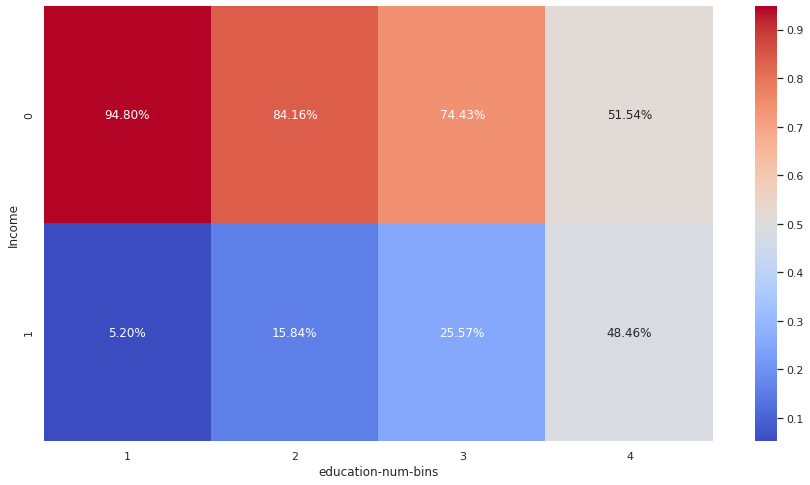

In [19]:
# df1 = df[["education-num-bins","Income"]].groupby(["education-num-bins", "Income"]).size().unstack(level=0)
# sns.set(rc = {'figure.figsize':(6,6)})
# sns.heatmap(df1,cmap='coolwarm',annot=True)

df1 = df[["education-num-bins","Income"]].groupby(["education-num-bins", "Income"]).size().unstack(level=0)
print(df["education-num-bins"].unique())
for profession in df["education-num-bins"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [20]:
contigency= pd.crosstab(df['education-num-bins'], df['Income']) 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.0


#### marital-status analysis

In [21]:
df["marital-status"].value_counts()
df["marital-status"] = df["marital-status"].replace([0,1],[1,5])

[1 5]


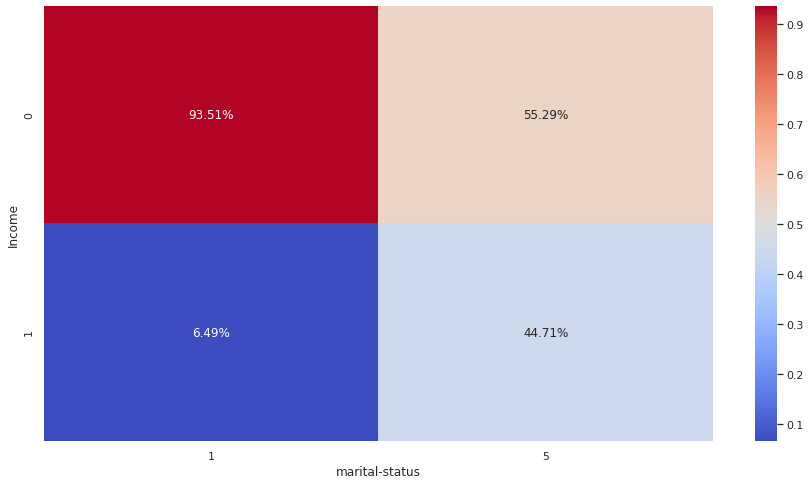

In [22]:
# df1 = df[["marital-status","Income"]].groupby(["marital-status", "Income"]).size().unstack(level=0)
# sns.set(rc = {'figure.figsize':(6,6)})
# sns.heatmap(df1,cmap='coolwarm',annot=True)
df1 = df[["marital-status","Income"]].groupby(["marital-status", "Income"]).size().unstack(level=0)
print(df["marital-status"].unique())
for profession in df["marital-status"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [23]:
contigency= pd.crosstab(df['marital-status'], df['Income']) 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.0


In [24]:
df["occupation"].value_counts()

Prof-specialty       5976
Craft-repair         4098
Exec-managerial      4066
Adm-clerical         3767
Sales                3650
Other-service        3294
Machine-op-inspct    2001
Transport-moving     1596
Handlers-cleaners    1369
Farming-fishing       988
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


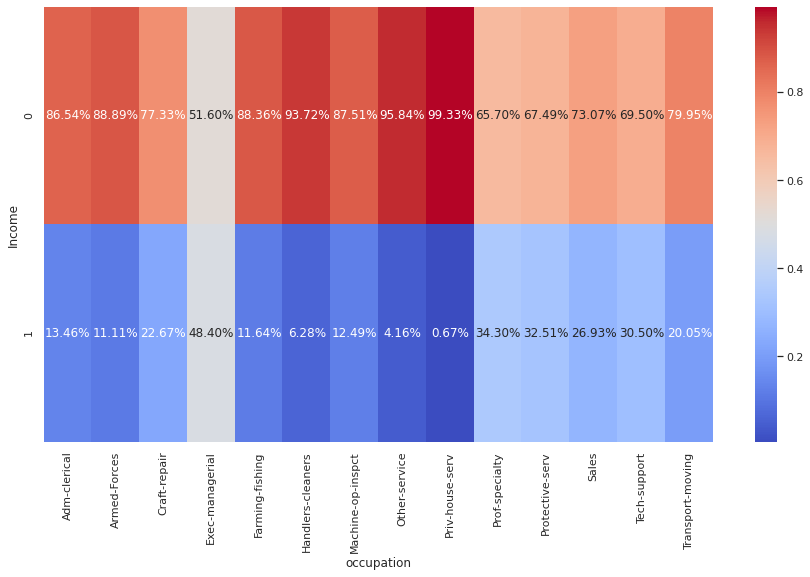

In [25]:
df_temp = df[["occupation","Income"]]
df1 = df_temp[["occupation","Income"]].groupby(["occupation", "Income"]).size().unstack(level=0)
print(df_temp["occupation"].unique())
for profession in df_temp["occupation"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [26]:
df1

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Income,,,,,,,,,,,,,,
0,0.86541,0.888889,0.773304,0.515986,0.883603,0.93718,0.875062,0.958409,0.993289,0.656961,0.674884,0.730685,0.695043,0.799499
1,0.13459,0.111111,0.226696,0.484014,0.116397,0.06282,0.124938,0.041591,0.006711,0.343039,0.325116,0.269315,0.304957,0.200501


In [27]:
dict1 = dict()
for column in df["occupation"].unique():
    if df1[column][1]<10/100:
        dict1[column] = 1
    elif df1[column][1]>=10/100 and df1[column][1]<20/100:
        dict1[column] = 2
    elif df1[column][1]>=20/100 and df1[column][1]<30/100:
        dict1[column] = 3
    elif df1[column][1]>=30/100 and df1[column][1]<40/100:
        dict1[column] = 4
    else:
        dict1[column] = 5

print(dict1)

{'Adm-clerical': 2, 'Exec-managerial': 5, 'Handlers-cleaners': 1, 'Prof-specialty': 4, 'Other-service': 1, 'Sales': 3, 'Craft-repair': 3, 'Transport-moving': 3, 'Farming-fishing': 2, 'Machine-op-inspct': 2, 'Tech-support': 4, 'Protective-serv': 4, 'Armed-Forces': 2, 'Priv-house-serv': 1}


In [28]:
li1 = []
li2 = []
for key in (dict1):
    li1.append(key)
    li2.append(dict1[key])
print(li1)
print(li2)

df["occupation"] = df["occupation"].replace(li1,li2)
df["occupation"].value_counts()

['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
[2, 5, 1, 4, 1, 3, 3, 3, 2, 2, 4, 4, 2, 1]


3    9344
4    7553
2    6765
1    4812
5    4066
Name: occupation, dtype: int64

[2 5 1 4 3]


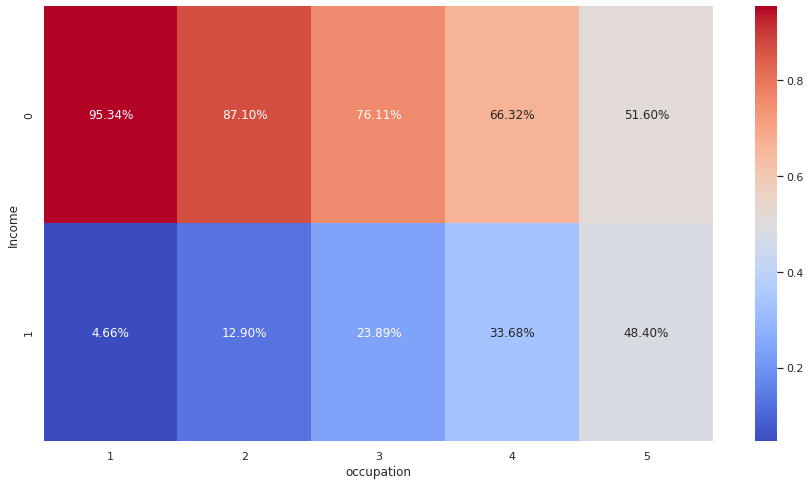

In [29]:
df_temp = df[["occupation","Income"]]
df1 = df_temp[["occupation","Income"]].groupby(["occupation", "Income"]).size().unstack(level=0)
print(df_temp["occupation"].unique())
for profession in df_temp["occupation"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

#### fnlwgt

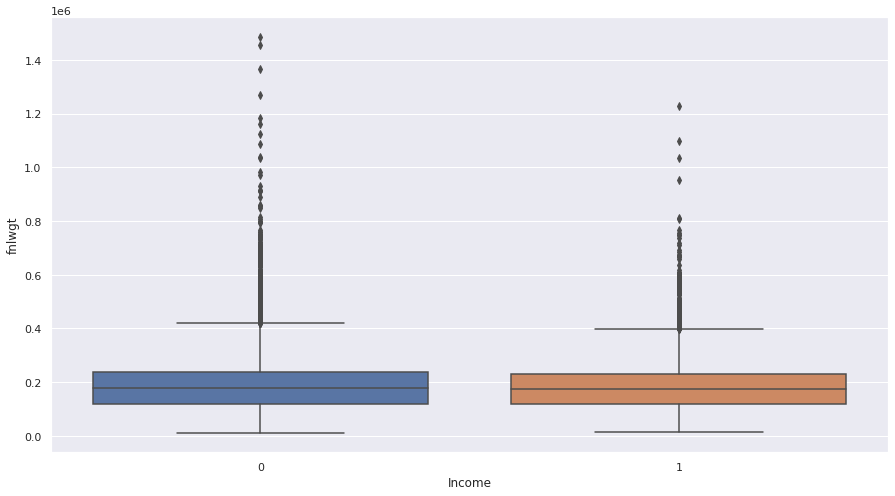

In [30]:
sns.boxplot(x = df["Income"],y = df["fnlwgt"])

In [31]:
df.drop(["fnlwgt"],axis = 1,inplace = True)

In [32]:
df["relationship"].value_counts()

Husband           13189
Not-in-family      8304
Own-child          5058
Unmarried          3444
Wife               1564
Other-relative      981
Name: relationship, dtype: int64

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


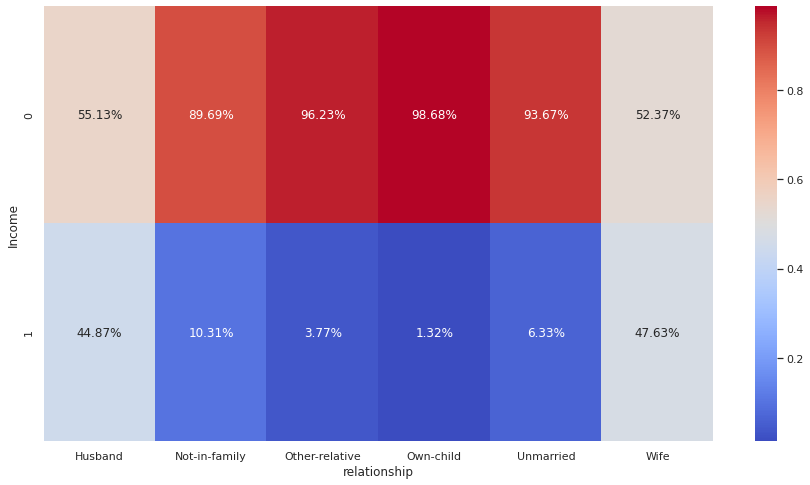

In [33]:
df_temp = df[["relationship","Income"]]
df1 = df_temp[["relationship","Income"]].groupby(["relationship", "Income"]).size().unstack(level=0)
print(df_temp["relationship"].unique())
for profession in df_temp["relationship"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [34]:
df["relationship"] = df["relationship"].replace(["Husband"],[5])
df["relationship"] = df["relationship"].replace(["Wife"],[5])
df["relationship"] = df["relationship"] == 5 
df["relationship"] = df["relationship"].replace([True,False],[5,1])
df["relationship"].value_counts()

1    17787
5    14753
Name: relationship, dtype: int64

#### race analysis

In [35]:
df["race"].value_counts()
df["race"] = df["race"].replace([1,0],[2.5,1.5])

[2.5 1.5]


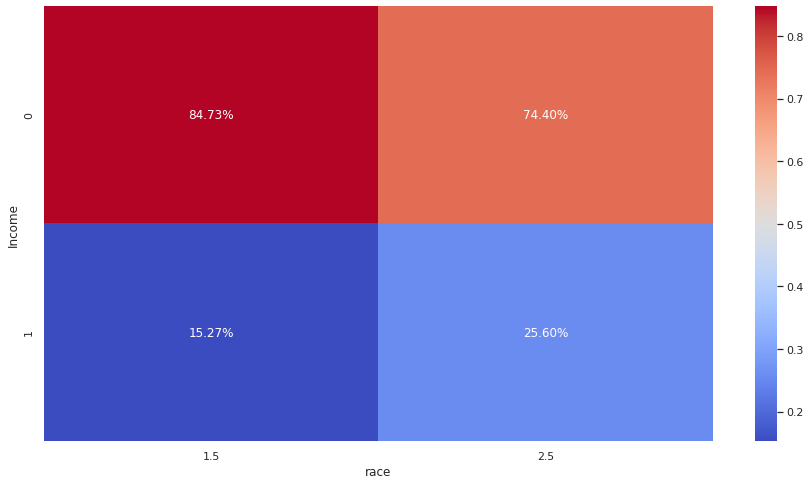

In [36]:
# df1 = df[["race","Income"]].groupby(["race", "Income"]).size().unstack(level=0)
# # print(train_csv["Profession"].unique())
# # for profession in train_csv["Profession"].unique():
# #     df[profession] = df[profession]/sum(df[profession])
# sns.set(rc = {'figure.figsize':(6,6)})
# sns.heatmap(df1,cmap='coolwarm',annot=True)

df_temp = df[["race","Income"]]
df1 = df_temp[["race","Income"]].groupby(["race", "Income"]).size().unstack(level=0)
print(df_temp["race"].unique())
for profession in df_temp["race"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [37]:
contigency= pd.crosstab(df['race'], df['Income']) 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

3.2981246872299996e-53


#### sex analysis

In [38]:
df["sex"].value_counts()
df["sex"] = df["sex"].replace([0,1],[1,3])

[3 1]


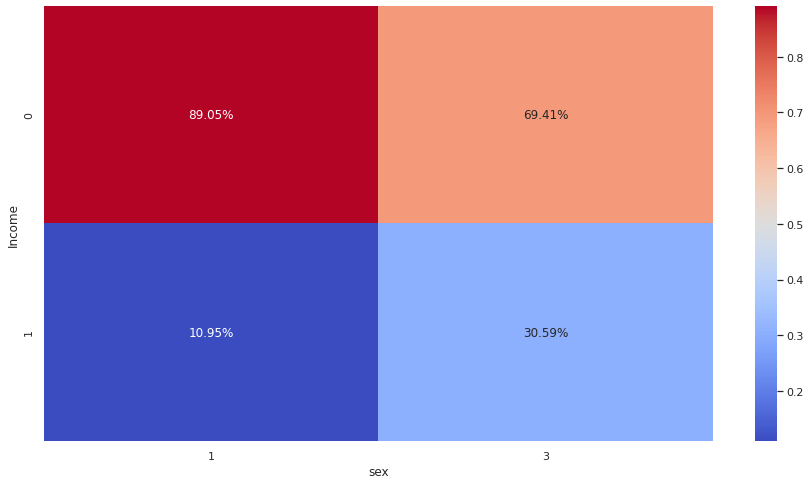

In [39]:
# df1 = df[["sex","Income"]].groupby(["sex", "Income"]).size().unstack(level=0)
# # print(train_csv["Profession"].unique())
# # for profession in train_csv["Profession"].unique():
# #     df[profession] = df[profession]/sum(df[profession])
# sns.set(rc = {'figure.figsize':(6,6)})
# sns.heatmap(df1,cmap='coolwarm',annot=True)

df_temp = df[["sex","Income"]]
df1 = df_temp[["sex","Income"]].groupby(["sex", "Income"]).size().unstack(level=0)
print(df_temp["sex"].unique())
for profession in df_temp["sex"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [40]:
contigency= pd.crosstab(df['sex'], df['Income']) 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.0


#### capital-gain

In [41]:
df["capital-gain"] = df["capital-gain"]>40000 
df["capital-gain"] = df["capital-gain"].replace([True,False],[5,1])
df["capital-gain"].value_counts()

1    32379
5      161
Name: capital-gain, dtype: int64

[1 5]


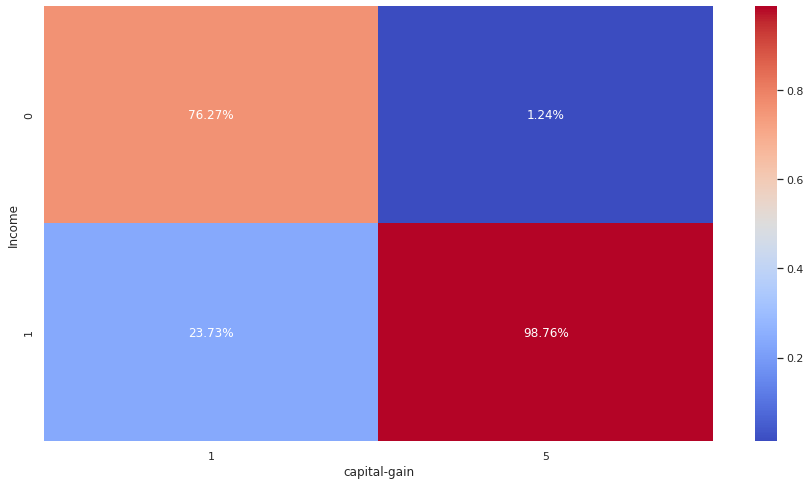

In [42]:
# df1 = df[["capital-gain","Income"]].groupby(["capital-gain", "Income"]).size().unstack(level=0)
# # print(train_csv["Profession"].unique())
# # for profession in train_csv["Profession"].unique():
# #     df[profession] = df[profession]/sum(df[profession])
# sns.set(rc = {'figure.figsize':(6,6)})
# sns.heatmap(df1,cmap='coolwarm',annot=True)

df_temp = df[["capital-gain","Income"]]
df1 = df_temp[["capital-gain","Income"]].groupby(["capital-gain", "Income"]).size().unstack(level=0)
print(df_temp["capital-gain"].unique())
for profession in df_temp["capital-gain"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

#### drop capital-los

In [43]:
df.drop(["capital-los"],axis = 1,inplace = True)

#### workclass

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc']


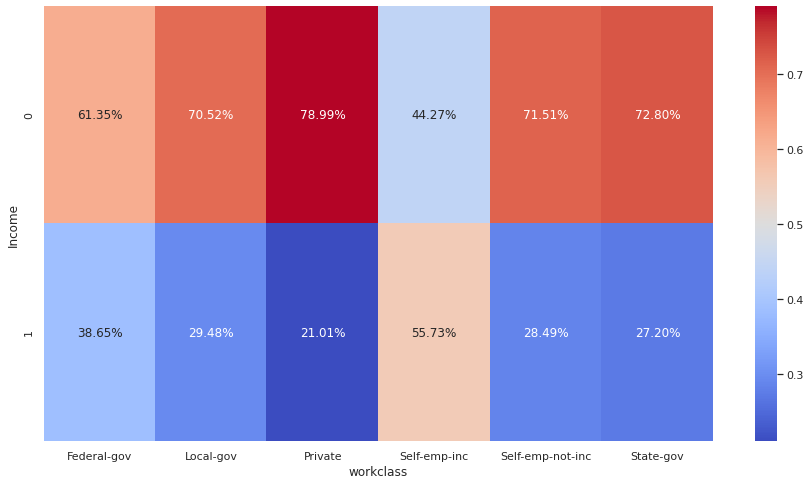

In [44]:
df1 = df[["workclass","Income"]].groupby(["workclass", "Income"]).size().unstack(level=0)
print(df["workclass"].unique())
for profession in df["workclass"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [45]:
df1

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
Income,,,,,,
0,0.613542,0.705208,0.789907,0.442652,0.715073,0.728043
1,0.386458,0.294792,0.210093,0.557348,0.284927,0.271957


In [46]:
# dict1 = {"Local-gov":30,"Private":1,"Self-emp-not-inc":2,"Federal-gov":2,"Self-emp-inc":3}
dict1 = dict()
for column in df1.columns:
    dict1[column] = df1[column][1]
dict1

{'Federal-gov': 0.38645833333333335,
 'Local-gov': 0.29479216435738176,
 'Private': 0.21009293983368663,
 'Self-emp-inc': 0.557347670250896,
 'Self-emp-not-inc': 0.2849271940181031,
 'State-gov': 0.27195685670261943}

In [47]:
li1 = []
li2 = []
for key in dict1:
    li1.append(key)
    li2.append(dict1[key])
df["workclass"] = df["workclass"].replace(li1,li2)

[0.27195686 0.28492719 0.21009294 0.38645833 0.29479216 0.55734767]


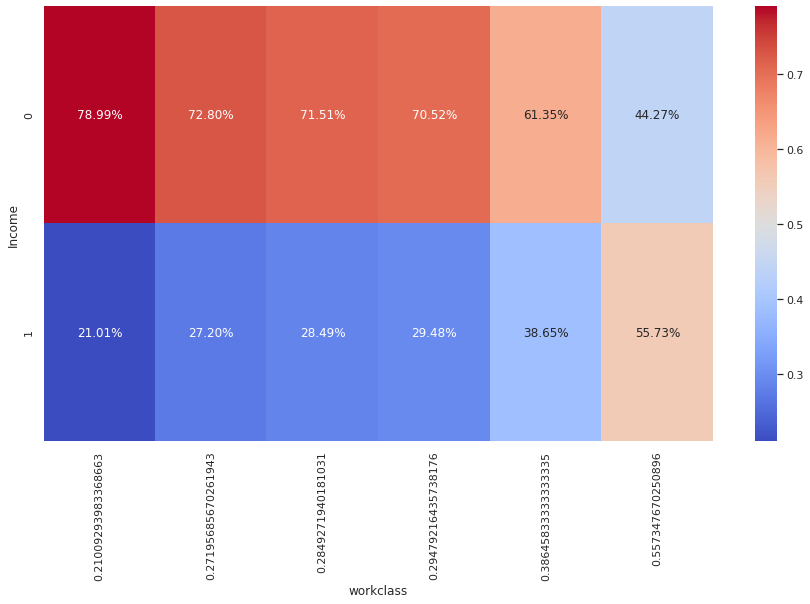

In [48]:
df1 = df[["workclass","Income"]].groupby(["workclass", "Income"]).size().unstack(level=0)
print(df["workclass"].unique())
for profession in df["workclass"].unique():
    df1[profession] = df1[profession]/sum(df1[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1,cmap='coolwarm',annot=True,fmt='.2%')

In [49]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,Income,education-num-bins,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital-status_0,marital-status_1,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.030671,0.271957,Bachelors,13,1,2,1,2.5,3,1,0.103983,3,0,4,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.837109,0.284927,Bachelors,13,5,5,5,2.5,3,1,-1.875457,3,0,4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.042642,0.210093,HS-grad,9,1,1,1,2.5,3,1,0.103983,3,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.057047,0.210093,High school,7,5,1,5,1.5,3,1,0.103983,3,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.775768,0.210093,Bachelors,13,5,4,5,1.5,1,1,0.103983,3,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### selecting req columns

In [50]:
df_selected = df[["age","workclass","education-num-bins","marital-status","occupation","relationship","race","sex","capital-gain","hours-per-week","native-country","Income"]]

In [51]:
df_selected.head()

,age,workclass,education-num-bins,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,Income
0,0.030671,0.271957,4,1,2,1,2.5,3,1,0.103983,3,0
1,0.837109,0.284927,4,5,5,5,2.5,3,1,-1.875457,3,0
2,-0.042642,0.210093,2,1,1,1,2.5,3,1,0.103983,3,0
3,1.057047,0.210093,2,5,1,5,1.5,3,1,0.103983,3,0
4,-0.775768,0.210093,4,5,4,5,1.5,1,1,0.103983,3,0


Index(['age', 'workclass', 'education-num-bins', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'hours-per-week', 'native-country', 'Income'],
      dtype='object')


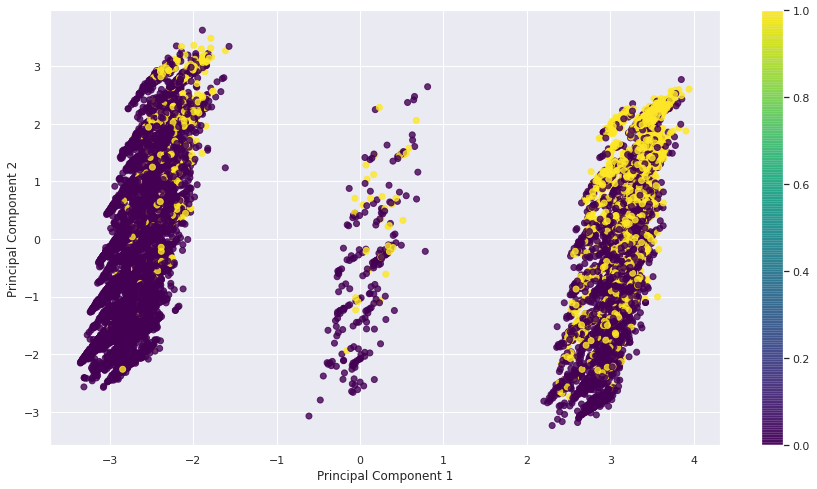

In [52]:
X = df_selected.copy()
print(X.columns)
X.drop(["Income"],axis = 1,inplace = True)
pca = PCA(2)
X_projected = pca.fit_transform(X)
y = df_selected.Income
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

fig = plt.figure()
plt.scatter(x1, x2,
        c=y, alpha=0.8,
        cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

In [53]:
df_selected.to_csv(r'/content/final_adult_2.csv', index = False, header = True)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X = df_selected.copy()
X.drop(["Income"],axis = 1,inplace = True)
y = df_selected.Income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6847  559]
 [1126 1230]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7406
           1       0.69      0.52      0.59      2356

    accuracy                           0.83      9762
   macro avg       0.77      0.72      0.74      9762
weighted avg       0.82      0.83      0.82      9762



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [60]:
clf=RandomForestClassifier(n_estimators=100)

In [61]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred=clf.predict(X_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.816840811309158


In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7889776685105511


In [67]:
from sklearn.svm import SVC
classifier = SVC()
print(classifier)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_pred)))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------Accuracy Score on the Test set--------------------
83%


In [68]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
print(classifier)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_pred)))

GaussianNB(priors=None, var_smoothing=1e-09)

--------------------Accuracy Score on the Test set--------------------
82%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
list_acc1 = []
list_acc = []
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_train_pred = neigh.predict(X_train)
    y_test = neigh.predict(X_test) 
    acc1 = accuracy_score(y_train,y_train_pred)
    acc = accuracy_score(y_test,y_pred) 
    f1 = f1_score(y_test, y_pred, average='weighted')                           
    print(i,f1,acc)
    list_acc1.append(f1)
    list_acc.append(acc)


In [ ]:
sns.lineplot(x = range(1,20),y = list_acc1)    
sns.lineplot(x = range(1,20),y = list_acc)